<a href="https://colab.research.google.com/github/MarcM987/test-assignment-MarcM987/blob/main/Phase2_DATA_301_Lab_1A_MarcMartinez%26RicardoChavez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Distribution of First Digits

In this lab, you will explore the distribution of first digits in real data. For example, the first digits of the numbers 52, 30.8, and 0.07 are 5, 3, and 7 respectively. In this lab, you will investigate the question: how frequently does each digit 1-9 appear as the first digit of the number?

## Question 0

Make a prediction. 

1. Approximately what percentage of the values do you think will have a _first_ digit of 1? What percentage of the values do you think will have a first digit of 9?
2. Approximately what percentage of the values do you think will have a _last_ digit of 1? What percentage of the values do you think will have a last digit of 9?

(Don't worry about being wrong. You will earn full credit for any justified answer.)

**ENTER YOUR WRITTEN EXPLANATION HERE.**


1. We predict that the percentage of values with the first digit being "1" will be at least 60%. This is beacause a stock will either have a price value with magnitude of  1,  100,or  1000. I know sp500 has one of the best stocks in the market within each sector so it makes sense for some of them to lie within the  100 or  1000. In my few years of watching stocks i know most competitive stocks lie within  100's hence the 60%

2. I can see 30% being an approximate number for first digit being 9 since itd either be  9,  90,  9000. 90 being the closest to typical high performance stocks, lets say a stock dips below 100 on a bad day 

## Question 1

The [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index) is a stock index based on the market capitalizations of large companies that are publicly traded on the NYSE or NASDAQ. The CSV file (https://dlsun.github.io/pods/data/sp500.csv) contains data from February 1, 2018 about the stocks that comprise the S&P 500. We will investigate the first digit distributions of the variables in this data set.

Read in the S&P 500 data. What is the unit of observation in this data set? Is there a variable that is natural to use as the index? If so, set that variable to be the index. Once you are done, display the `DataFrame`.

In [ ]:

import pandas as pd

data_dir = "http://dlsun.github.io/pods/data/"
df_sp500 = pd.read_csv(data_dir + "sp500.csv")
df_sp500.set_index(["Name"], inplace=True)
df_sp500.sort_index()

,date,open,close,volume
Name,,,,
A,2018-02-01,$73.18,$72.83,2008177
AAL,2018-02-01,$54.00,$53.88,3623078
AAP,2018-02-01,$116.24,$117.29,760629
AAPL,2018-02-01,$167.16,$167.78,47230787
ABBV,2018-02-01,$112.24,$116.34,9943452
...,...,...,...,...
XYL,2018-02-01,$72.50,$74.84,1817612
YUM,2018-02-01,$84.24,$83.98,1685275
ZBH,2018-02-01,$126.35,$128.19,1756300


**ENTER YOUR WRITTEN EXPLANATION HERE.**

As stock symbols/Names are unique, they are immediately appealing as an index. This would potentially become problematic if the data set was expanded to multiple days (where I would then consider a combination of Name and date), but our specific data set is limited to a single day and thus Name serves perfectly as the index. 

## Question 2

We will start by looking at the `volume` column. This variable tells us how many shares were traded on that date.

Extract the first digit of every value in this column. (_Hint:_ First, turn the numbers into strings. Then, use the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` to extract the first character of each string.) Make an appropriate visualization to display the distribution of the first digits. (_Hint:_ Think carefully about whether the variable you are plotting is quantitative or categorical.)

How does this compare with what you predicted in Question 0?

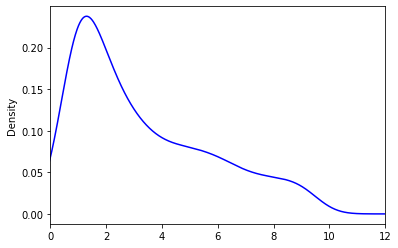

In [ ]:


df_sp500["volume"] = df_sp500["volume"].astype("string")

df_sp500["volume"]


df_sp500['first'] = df_sp500["volume"].str[0]

df_sp500['volume'].value_counts()

# convert string to an integer
df_sp500['first'] = df_sp500['first'].astype(int)

df_sp500['first'].plot.density(xlim = (0,12),color='blue')

**ENTER YOUR WRITTEN EXPLANATION HERE.**

The data classfiication of a number's frequency begining with a 1, 2, 3, 4, 5, 6, 7, 8, or 9 is a quantitive classification. Hence our distribution visualization choice. Our predicition compared well, although it was based on closing. The same logic applies for volume, volume of stocks sold must be in the one millions.  


## Question 3

Now, repeat Question 2, but for the distribution of _last_ digits. Again, make an appropriate visualization and compare with your prediction in Question 0.

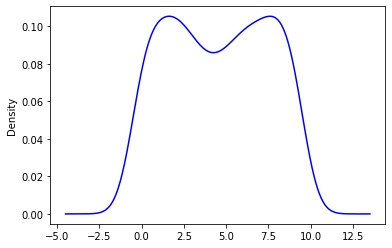

In [ ]:
# modify to density plot and change descriptions , also change to to standard indexing

df_sp500['last'] = df_sp500['volume'].str.strip().str[-1]

df_sp500['last'].value_counts()

# convert string to an integer
df_sp500['last'] = df_sp500['last'].astype(int)

df_sp500['last'].plot.density(color='blue')

**ENTER YOUR WRITTEN EXPLANATION HERE.**

Seems like volumes peak twice however my answer to question zero was reffering to stock price not volume. No further comment but to proceed and validate findings of stock price instead 

## Question 4

Maybe the `volume` column was just a fluke. Let's see if the first digit distribution holds up when we look at a very different variable: the closing price of the stock. Make a visualization of the first digit distribution of the closing price (the `close` column of the `DataFrame`). Comment on what you see.

(_Hint:_ What type did `pandas` infer this variable as and why? You will have to first clean the values using the [text processing functionalities](https://pandas.pydata.org/pandas-docs/stable/text.html) of `pandas` and then convert this variable to a quantitative variable.)

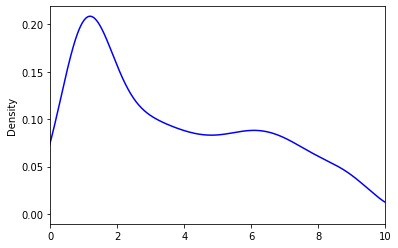

In [ ]:


# assumes it to be a string, most likely due to the money sign 
df_sp500['close_num'] = df_sp500['close'].str[1]
#df_sp500['close_num'] = df_sp500['close_num'].str.replace(',', '')
df_sp500['close_num'] = df_sp500['close_num'].astype(float)
df_sp500['close_num'].plot.density(xlim = (0,10),color='blue')

**ENTER YOUR WRITTEN EXPLANATION HERE.**

Pandas likely infered this variable as an 'object' due to the $ symbol. The distribution here is very interesting.

Our original predicition was that the stock price would fall within th 100's price value hence the hypothesis that there would be a high density for the first value bieng 1.

I suspect this is due to the nature of the variables. The previous variable, 'volume', begins at 0 before increasing by its nature. However, our current variable, 'closing', is based on value which could be anything. I beleive the differences in distribution are likely due to the more random behavior of the 'closing' than the more steadily growing behavior of the 'volume'.